## Import Libraries

In [1]:
%pip install pandas
import pandas as pd
import sqlite3
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np


Note: you may need to restart the kernel to use updated packages.


## Read CSV

In [2]:
# Load the CSV files
customers = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_customers_dataset.csv')
orders = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_orders_dataset.csv')
order_items = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_order_items_dataset.csv')
products = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_products_dataset.csv')
sellers = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_sellers_dataset.csv')
geolocation = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_geolocation_dataset.csv')
payments = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_order_payments_dataset.csv')
reviews = pd.read_csv(r'D:\projects\Data Analysis\Brazillian Ecommerce Olist Dataset\olist_order_reviews_dataset.csv')

## Create In-Memory SQLite Database

In [3]:
# Create an in-memory SQLite database using sqlite3 directly
conn = sqlite3.connect(':memory:')

In [4]:
# Write the DataFrames to SQL tables
customers.to_sql('customers', con=conn, index=False, if_exists='replace')
orders.to_sql('orders', con=conn, index=False, if_exists='replace')
order_items.to_sql('order_items', con=conn, index=False, if_exists='replace')
products.to_sql('products', con=conn, index=False, if_exists='replace')
sellers.to_sql('sellers', con=conn, index=False, if_exists='replace')
geolocation.to_sql('geolocation', con=conn, index=False, if_exists='replace')
payments.to_sql('payments', con=conn, index=False, if_exists='replace')
reviews.to_sql('reviews', con=conn, index=False, if_exists='replace')

99224

## Queries for Showing All Datasets

In [5]:
# Query the first 5 rows from the customers table
query = "SELECT * FROM customers LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Query the first 5 rows from the orders table
query = "SELECT * FROM orders LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# Query the first 5 rows from the order_items table
query = "SELECT * FROM order_items LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# Query the first 5 rows from the products table
query = "SELECT * FROM products LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# Query the first 5 rows from the sellers table
query = "SELECT * FROM sellers LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
# Query the first 5 rows from the geolocation table
query = "SELECT * FROM geolocation LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# Query the first 5 rows from the payments table
query = "SELECT * FROM payments LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
# Query the first 5 rows from the reviews table
query = "SELECT * FROM reviews LIMIT 5"
result = pd.read_sql(query, con=conn)
result

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Data Cleaning

In [13]:
# Data Cleaning

# Handle missing values
for table in ['customers', 'orders', 'order_items', 'products', 'sellers', 'geolocation', 'payments', 'reviews']:
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, con=conn)
    
    # Print info about missing values
    print(f"\nMissing values in {table} table:")
    print(df.isnull().sum())
    
    # Fill numeric columns with median
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    
    # Fill categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
    
    # Update the table in the database
    df.to_sql(table, con=conn, if_exists='replace', index=False)
    print(f"Updated {table} table in the database")



Missing values in customers table:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Updated customers table in the database

Missing values in orders table:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Updated orders table in the database

Missing values in order_items table:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Updated order_items table in the database

Missing values in products table:
product_id                      0
product_category_name         610
pro

In [14]:
# Handle duplicate rows
for table in ['customers', 'orders', 'order_items', 'products', 'sellers', 'geolocation', 'payments', 'reviews']:
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, con=conn)
    
    # Remove duplicate rows
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    removed_rows = initial_rows - len(df)
    
    if removed_rows > 0:
        print(f"\nRemoved {removed_rows} duplicate rows from {table} table")
        df.to_sql(table, con=conn, if_exists='replace', index=False)
        print(f"Updated {table} table in the database")
    else:
        print(f"\nNo duplicate rows found in {table} table")


No duplicate rows found in customers table

No duplicate rows found in orders table

No duplicate rows found in order_items table

No duplicate rows found in products table

No duplicate rows found in sellers table

Removed 261831 duplicate rows from geolocation table
Updated geolocation table in the database

No duplicate rows found in payments table

No duplicate rows found in reviews table


In [15]:
# Convert date columns to datetime type
date_columns = {
    'orders': ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'],
    'order_items': ['shipping_limit_date'],
    'payments': ['payment_sequential'],
    'reviews': ['review_creation_date', 'review_answer_timestamp']
}

for table, columns in date_columns.items():
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, con=conn)
    
    for column in columns:
        df[column] = pd.to_datetime(df[column], errors='coerce')
    
    df.to_sql(table, con=conn, if_exists='replace', index=False)
    print(f"\nConverted date columns in {table} table to datetime type")

print("\nData cleaning completed.")


Converted date columns in orders table to datetime type

Converted date columns in order_items table to datetime type

Converted date columns in payments table to datetime type

Converted date columns in reviews table to datetime type

Data cleaning completed.


## EDA

In [16]:
# 1. Order Status Distribution
query = """
SELECT order_status, COUNT(*) as count
FROM orders
GROUP BY order_status
ORDER BY count DESC
"""
order_status_dist = pd.read_sql(query, con=conn)
print("Order Status Distribution:")
order_status_dist

Order Status Distribution:


,order_status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


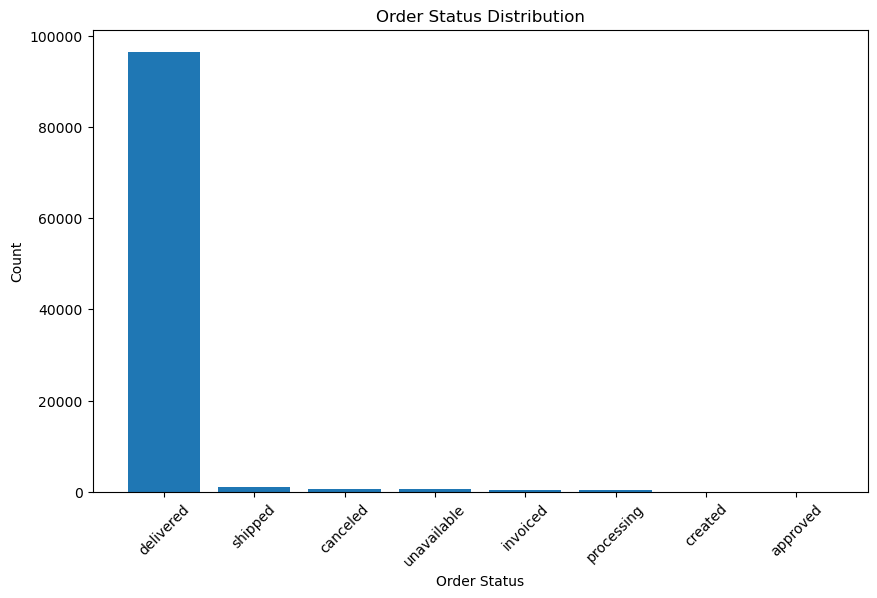

In [17]:
# Order Status Distribution
plt.figure(figsize=(10, 6))
plt.bar(order_status_dist['order_status'], order_status_dist['count'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 2. Top 10 Product Categories
query = """
SELECT product_category_name, COUNT(*) as count
FROM products
GROUP BY product_category_name
ORDER BY count DESC
LIMIT 10
"""
top_categories = pd.read_sql(query, con=conn)
print("Top 10 Product Categories:")
top_categories

Top 10 Product Categories:


,product_category_name,count
0,cama_mesa_banho,3639
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
5,automotivo,1900
6,informatica_acessorios,1639
7,brinquedos,1411
8,relogios_presentes,1329
9,telefonia,1134


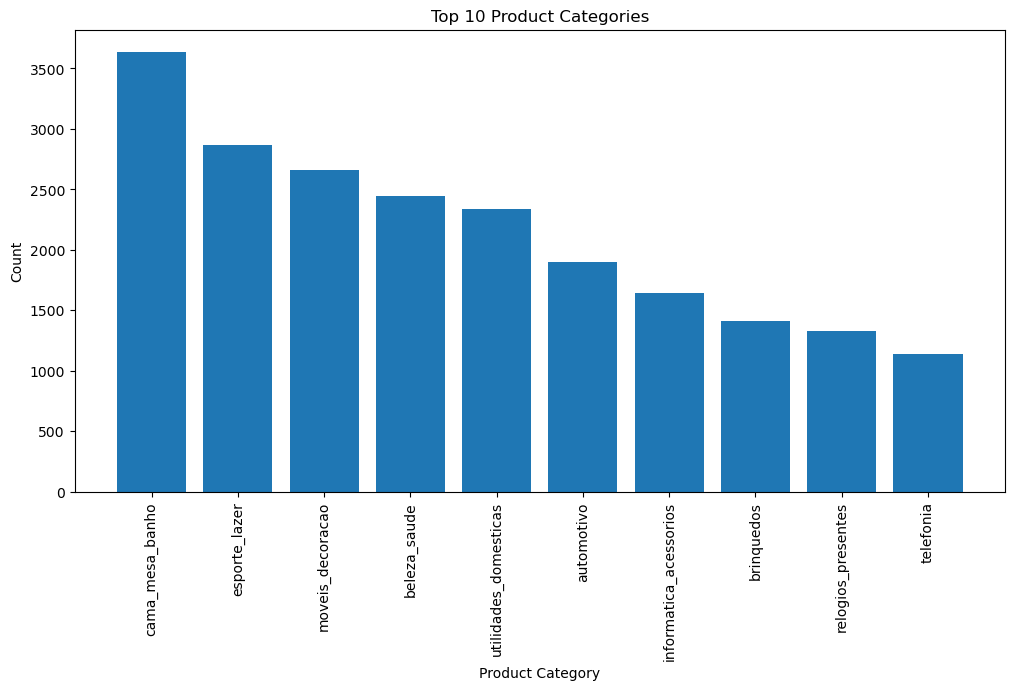

In [19]:
# Top 10 Product Categories
plt.figure(figsize=(12, 6))
plt.bar(top_categories['product_category_name'], top_categories['count'])
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [20]:
# 3. Average Order Value
query = """
SELECT AVG(payment_value) as avg_order_value
FROM payments
"""
avg_order_value = pd.read_sql(query, con=conn)
print("Average Order Value:")
avg_order_value

Average Order Value:


,avg_order_value
0,154.10038


In [21]:
# 4. Customer Distribution by State
query = """
SELECT customer_state, COUNT(*) as count
FROM customers
GROUP BY customer_state
ORDER BY count DESC
"""
customer_dist = pd.read_sql(query, con=conn)
print("Customer Distribution by State:")
customer_dist

Customer Distribution by State:


,customer_state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


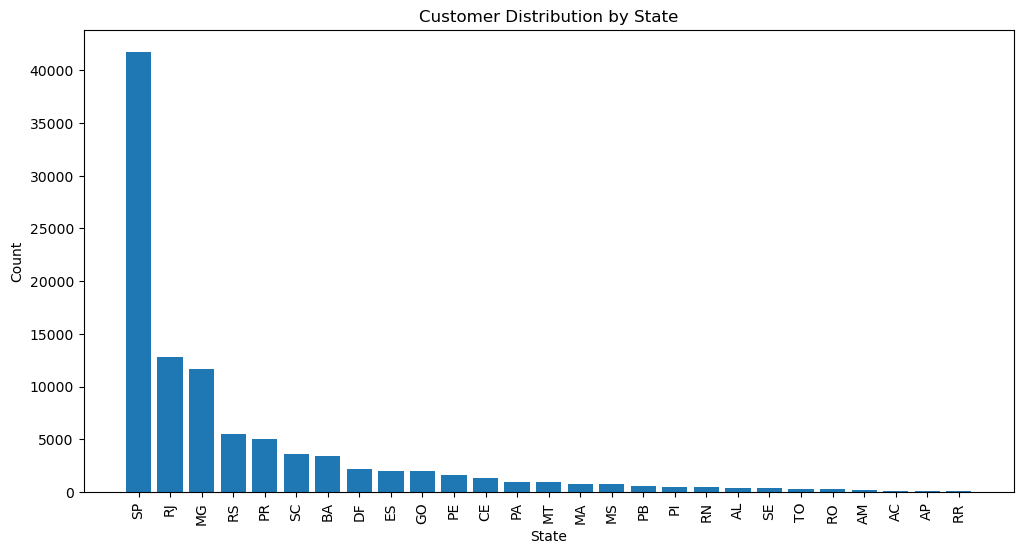

In [22]:
# Customer Distribution by State
plt.figure(figsize=(12, 6))
plt.bar(customer_dist['customer_state'], customer_dist['count'])
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [23]:
# 5. Average Review Score
query = """
SELECT AVG(review_score) as avg_review_score
FROM reviews
"""
avg_review_score = pd.read_sql(query, con=conn)
print("Average Review Score:")
avg_review_score

Average Review Score:


,avg_review_score
0,4.086421


In [24]:
# 6. Top Selling Products
query = """
SELECT p.product_category_name, COUNT(*) as sales_count
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY sales_count DESC
LIMIT 10
"""
top_selling_products = pd.read_sql(query, con=conn)
print("Top 10 Selling Product Categories:")
top_selling_products

Top 10 Selling Product Categories:


,product_category_name,sales_count
0,cama_mesa_banho,12718
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


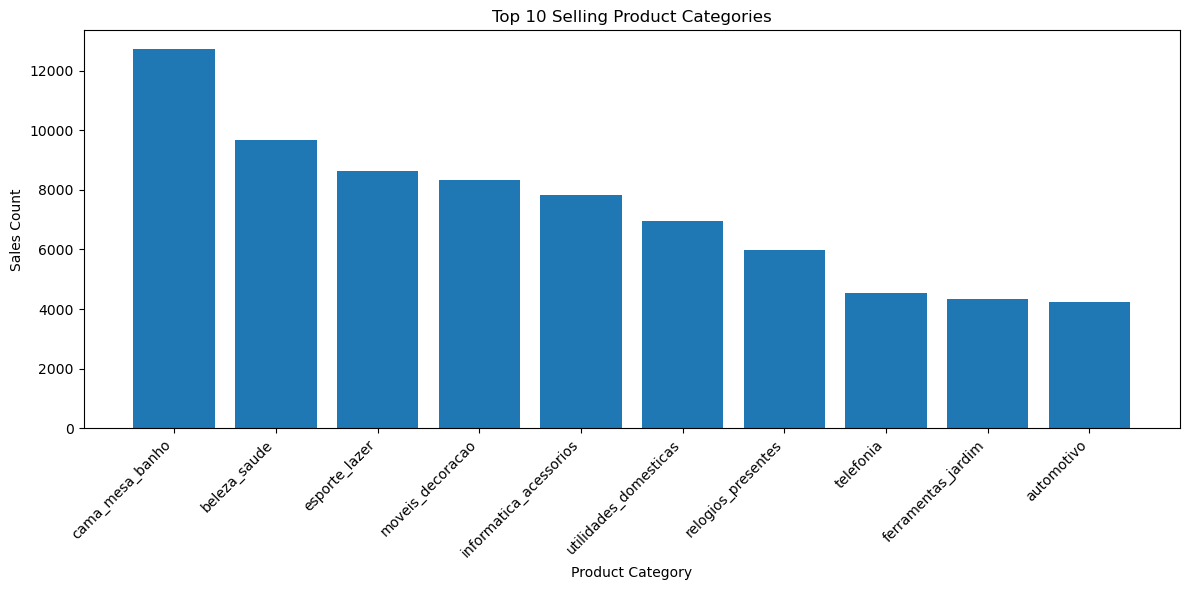

In [25]:
# Visualize Top Selling Products
plt.figure(figsize=(12, 6))
plt.bar(top_selling_products['product_category_name'], top_selling_products['sales_count'])
plt.title('Top 10 Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# 8. Average Delivery Time
query = """
SELECT AVG(JULIANDAY(order_delivered_customer_date) - JULIANDAY(order_purchase_timestamp)) as avg_delivery_time
FROM orders
WHERE order_status = 'delivered'
"""
avg_delivery_time = pd.read_sql(query, con=conn)
print("Average Delivery Time (in days):")
avg_delivery_time

Average Delivery Time (in days):


,avg_delivery_time
0,12.513219


In [29]:
# 9. Customer Retention Rate
query = """
WITH customer_orders AS (
    SELECT customer_id, COUNT(DISTINCT order_id) as order_count,
           MIN(order_purchase_timestamp) as first_order_date,
           MAX(order_purchase_timestamp) as last_order_date
    FROM orders
    GROUP BY customer_id
)
SELECT 
    COUNT(CASE WHEN order_count > 1 THEN 1 END) * 100.0 / COUNT(*) as retention_rate
FROM customer_orders
"""
retention_rate = pd.read_sql(query, con=conn)
print("Customer Retention Rate (%):")
retention_rate

Customer Retention Rate (%):


,retention_rate
0,0.0


In [32]:
# 10. Payment Method Distribution
query = """
SELECT payment_type, COUNT(*) as count, 
       COUNT(*) * 100.0 / (SELECT COUNT(*) FROM payments) as percentage
FROM payments
GROUP BY payment_type
ORDER BY count DESC
"""
payment_distribution = pd.read_sql(query, con=conn)
print("\nPayment Method Distribution:")
payment_distribution


Payment Method Distribution:


,payment_type,count,percentage
0,credit_card,76795,73.922376
1,boleto,19784,19.043952
2,voucher,5775,5.558978
3,debit_card,1529,1.471806
4,not_defined,3,0.002888


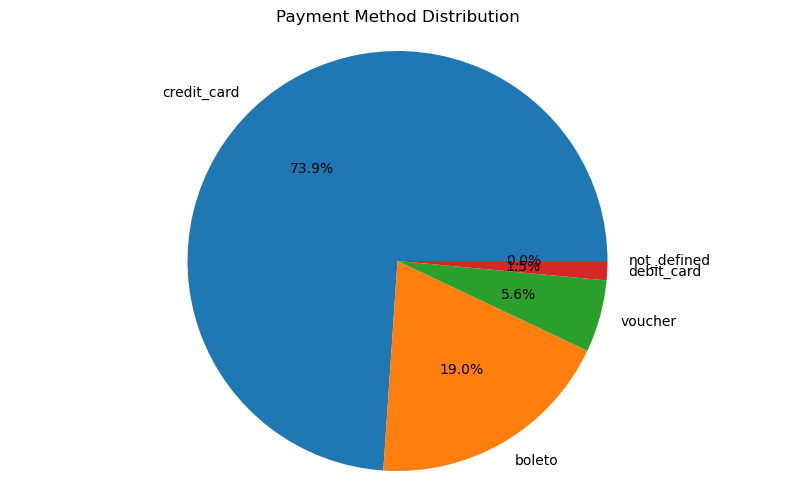

In [33]:
# Visualize Payment Method Distribution
plt.figure(figsize=(10, 6))
plt.pie(payment_distribution['percentage'], labels=payment_distribution['payment_type'], autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

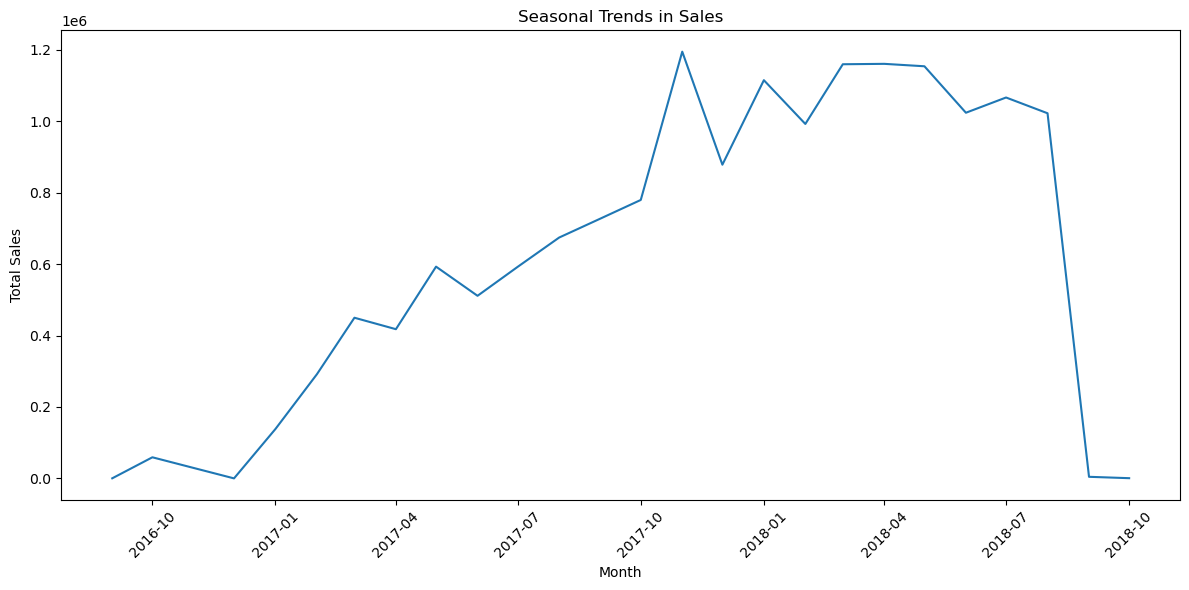

In [34]:
# 11. Seasonal Trends in Sales
query = """
SELECT 
    strftime('%Y-%m', order_purchase_timestamp) as month,
    COUNT(*) as order_count,
    SUM(payment_value) as total_sales
FROM orders
JOIN payments ON orders.order_id = payments.order_id
GROUP BY month
ORDER BY month
"""
seasonal_trends = pd.read_sql(query, con=conn)
seasonal_trends['month'] = pd.to_datetime(seasonal_trends['month'])

plt.figure(figsize=(12, 6))
plt.plot(seasonal_trends['month'], seasonal_trends['total_sales'])
plt.title('Seasonal Trends in Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# 12. Correlation between Review Scores and Delivery Time
query = """
SELECT 
    r.review_score,
    AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) as avg_delivery_time
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
WHERE o.order_status = 'delivered'
GROUP BY r.review_score
ORDER BY r.review_score
"""
review_delivery_correlation = pd.read_sql(query, con=conn)
print("\nCorrelation between Review Scores and Delivery Time:")
review_delivery_correlation


Correlation between Review Scores and Delivery Time:


,review_score,avg_delivery_time
0,1,21.246637
1,2,16.660580
2,3,14.259974
3,4,12.312356
4,5,10.623351


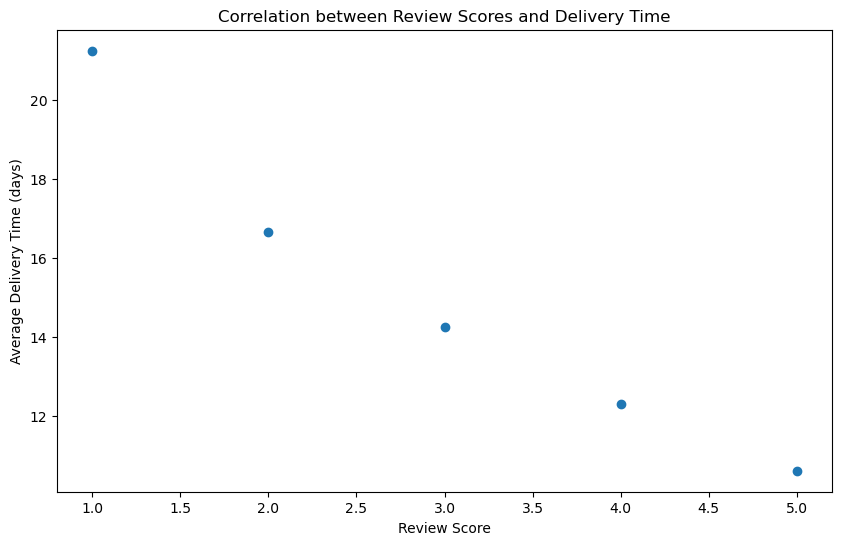

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(review_delivery_correlation['review_score'], review_delivery_correlation['avg_delivery_time'])
plt.title('Correlation between Review Scores and Delivery Time')
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Time (days)')
plt.show()

In [38]:
# Close the database connection
conn.close()

print("\nAnalysis complete. The database connection has been closed.")


Analysis complete. The database connection has been closed.
